In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from mpl_toolkits import mplot3d
from matplotlib import cm
plt.rcParams["figure.figsize"] = (10,10)

In [14]:
#GROVER COIN
C = np.ones((4,4))*0.5
for i in range(4):
    for j in range(4):
        if i == j:
            C[i][j] = -0.5
coinName = 'Grover Coin'

sum of probabilities:  1.0


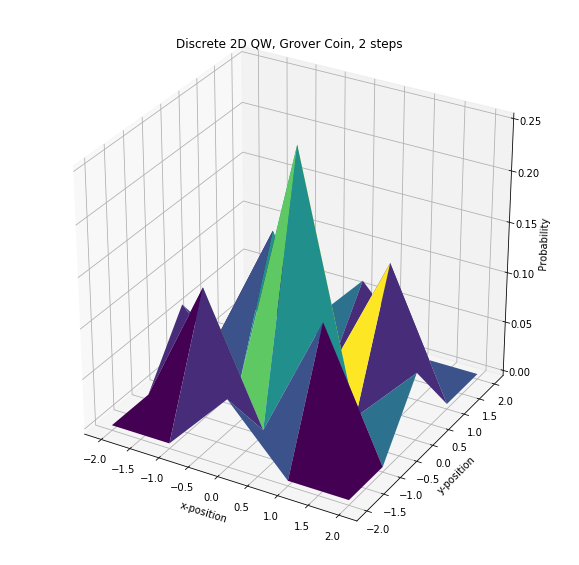

[[0.     0.     0.0625 0.     0.    ]
 [0.     0.125  0.     0.125  0.    ]
 [0.0625 0.     0.25   0.     0.0625]
 [0.     0.125  0.     0.125  0.    ]
 [0.     0.     0.0625 0.     0.    ]]


In [17]:
N = 2 # number of random steps
P = 2*N+1    # number of positions is P^2

up = np.array([1, 0, 0, 0])
down = np.array([0, 1, 0, 0])
left = np.array([0, 0, 1, 0])
right = np.array([0, 0, 0, 1])

#flipflop coin, istead of up up etc
Cuu = np.outer(up, down)
Cdd = np.outer(down, up)
Cll = np.outer(left, right)
Crr = np.outer(right, left)

Plus = np.roll(np.eye(P), 1, axis=0)
Minus = np.roll(np.eye(P), -1, axis=0)

Up = np.kron(np.eye(P), Plus)
Down = np.kron(np.eye(P), Minus)
Right = np.kron(Plus, np.eye(P))
Left = np.kron(Minus, np.eye(P))

#step operator
S = np.kron(Up, Cuu) + \
    np.kron(Down, Cdd) + \
    np.kron(Right, Crr) + \
    np.kron(Left, Cll)

#identity
I = np.kron(np.eye(P), np.eye(P))

#evolution operator
U_hat = S.dot(np.kron(I,C))
C0 = (up+down+left+right)/2

#initial state position
pos0x = np.zeros(P)
pos0y = np.zeros(P)
pos0x[N] = 1
pos0y[N] = 1

pos0 = np.kron(pos0x, pos0y)
#initial state
psi0 = np.kron(pos0, C0)

#evolved state
psiN = np.linalg.matrix_power(U_hat, N).dot(psi0)

prob = np.empty((P,P))    

for k in range(P):
    for K in range(P):
        posn = np.zeros((P,P))
        posn[k][K] = 1   
        #Measurement operator
        M_hat_k = np.kron(np.outer(posn,posn), np.eye(4))
        proj = M_hat_k.dot(psiN)
        prob[k][K] = proj.dot(proj.conjugate()).real  
        
#making sure normalised
print('sum of probabilities: ', np.sum(prob))

x = np.arange(-N,N+1,1)
y = np.arange(-N,N+1,1)
X,Y = np.meshgrid(x,y)
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, prob, rstride=1, cstride=1, cmap = 'viridis', edgecolor='none')
ax.set_xlabel('x-position')
ax.set_ylabel('y-position')
ax.set_zlabel('Probability')
plt.title(f"Discrete 2D QW, {coinName}, {N} steps")
plt.show()

print(prob)